Found 2352 images belonging to 2 classes.
Found 2381 images belonging to 2 classes.
Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 35s 309ms/step - accuracy: 0.8759 - loss: 0.8888 - val_accuracy: 0.4994 - val_loss: 5.0205 - learning_rate: 0.0010
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 284ms/step - accuracy: 0.9821 - loss: 0.5686 - val_accuracy: 0.4994 - val_loss: 5.6467 - learning_rate: 0.0010
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9872 - loss: 0.4586 - val_accuracy: 0.4994 - val_loss: 5.7490 - learning_rate: 0.0010
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.9915 - loss: 0.3778 
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - accuracy: 0.9889 - loss: 0.3703 - val_accuracy: 0.4981 - val_loss: 5.8453 - learning_rate: 0.0010
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 19s 259ms/step - accuracy: 0.9940 - loss: 0.3126 - val_accuracy: 0.4994 - val_loss: 5.9140 - learning_rate: 5.0000

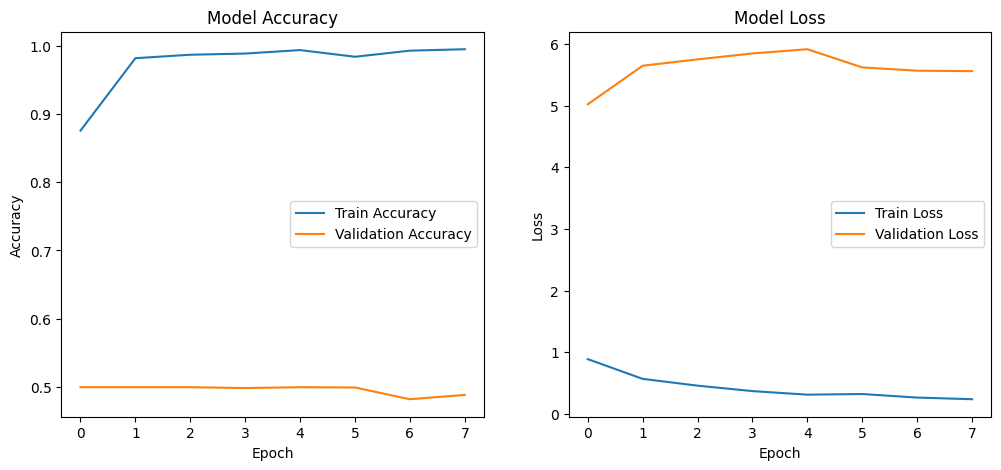

75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step


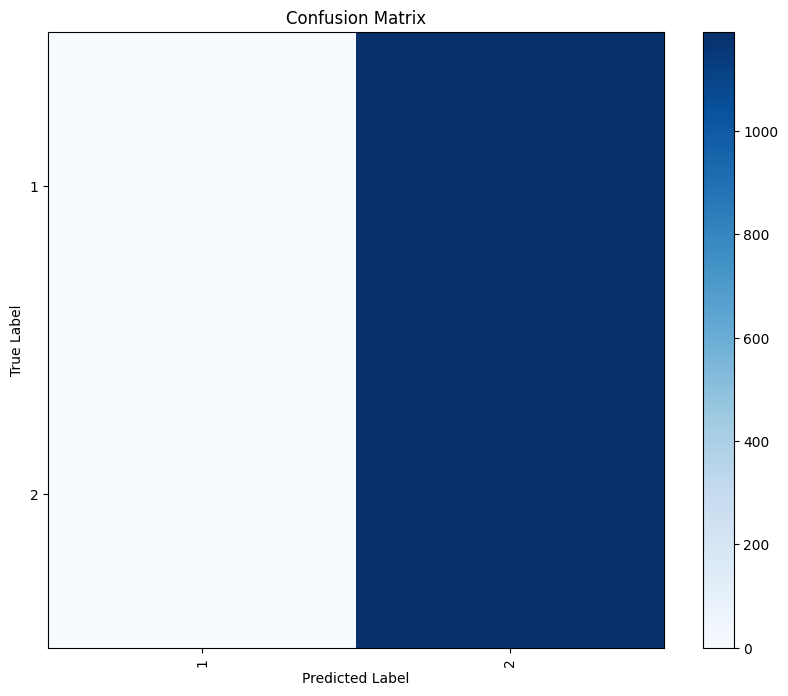

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1192
           2       0.50      1.00      0.67      1189

    accuracy                           0.50      2381
   macro avg       0.25      0.50      0.33      2381
weighted avg       0.25      0.50      0.33      2381

Macro F1 Score: 0.3330532212885154
Micro F1 Score: 0.499370012599748
Weighted F1 Score: 0.3326335826224652
Macro Precision: 0.249685006299874
Macro Recall: 0.5


C:\Users\cherisma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\cherisma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\cherisma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metri

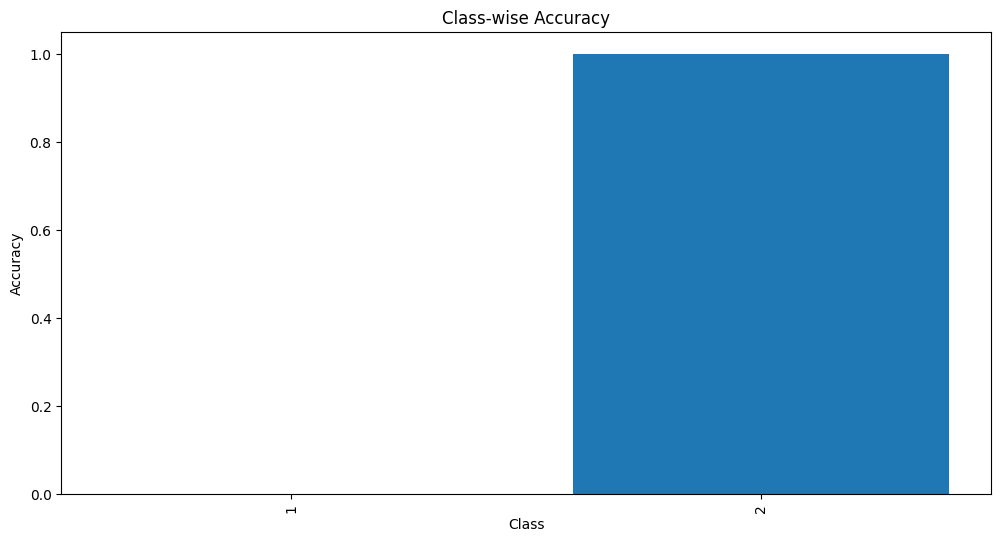

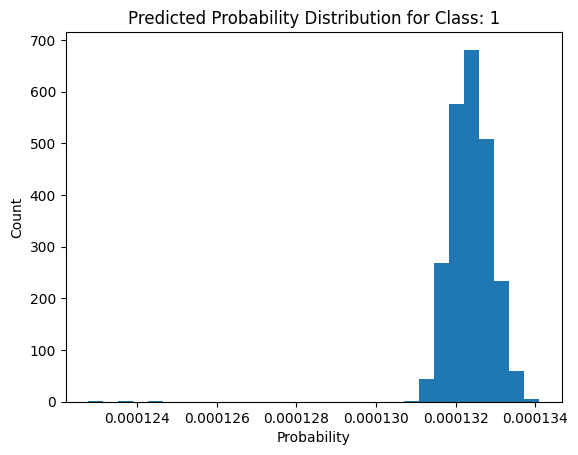

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Reshape, LSTM, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

# Dataset directories
train_dir = r"C:\Users\cherisma\OneDrive\Desktop\IIIT-HW-Telugu\TeluguSeg\train"
val_dir = r"C:\Users\cherisma\OneDrive\Desktop\IIIT-HW-Telugu\TeluguSeg\val"

IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory(
    val_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# CRNN Model architecture
inputs = Input(shape=(*IMG_SIZE, 3))

# Convolutional layers for feature extraction
x = Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Flatten()(x)
x = Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = Dropout(0.5)(x)

# Reshape for LSTM input: [batch_size, timesteps=1, features=256]
x = Reshape((1, 256))(x)

# LSTM layer for sequence modeling
x = LSTM(128, dropout=0.5, recurrent_dropout=0.5)(x)
x = Dropout(0.5)(x)

# Output layer with softmax for classification
outputs = Dense(train_gen.num_classes, activation='softmax')(x)

# Compile the CRNN model
crnn_model = Model(inputs, outputs)
crnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = crnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=[early_stop, reduce_lr]
)

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate performance on validation set
val_gen.reset()
Y_pred = crnn_model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen.classes

# Confusion matrix visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=np.arange(len(val_gen.class_indices)), labels=list(val_gen.class_indices.keys()), rotation=90)
plt.yticks(ticks=np.arange(len(val_gen.class_indices)), labels=list(val_gen.class_indices.keys()))
plt.show()

# Classification report and metrics
target_names = list(val_gen.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))

print("Macro F1 Score:", f1_score(y_true, y_pred, average='macro'))
print("Micro F1 Score:", f1_score(y_true, y_pred, average='micro'))
print("Weighted F1 Score:", f1_score(y_true, y_pred, average='weighted'))
print("Macro Precision:", precision_score(y_true, y_pred, average='macro'))
print("Macro Recall:", recall_score(y_true, y_pred, average='macro'))

# Per-class accuracy histogram
class_accuracies = []
for i in range(len(target_names)):
    idx = np.where(y_true == i)
    class_acc = accuracy_score(y_true[idx], y_pred[idx])
    class_accuracies.append(class_acc)

plt.figure(figsize=(12, 6))
plt.bar(target_names, class_accuracies)
plt.title('Class-wise Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)
plt.show()

# Histogram of predicted probabilities for the first class (example)
plt.hist(Y_pred[:, 0], bins=30)
plt.title(f'Predicted Probability Distribution for Class: {target_names[0]}')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.show()
